In [9]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
import pandas as pd

In [19]:
currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

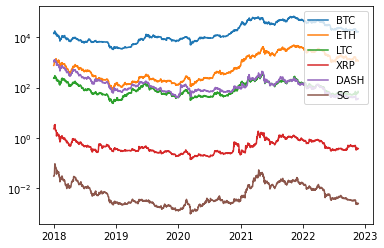

In [25]:
crypto = ['BTC' , 'ETH' , 'LTC' , 'XRP' , 'DASH' , 'SC']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f'{ticker}-{currency}',"yahoo",start,end);
   
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns=colnames
        first=False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames
        
        
plt.yscale('log')

for ticker in crypto:
    plt.plot(combined[ticker],label = ticker)
    
plt.legend(loc="upper right")

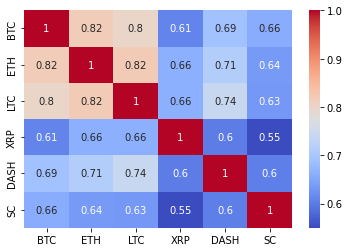

In [26]:
combined = combined.pct_change().corr(method = 'pearson')
sns.heatmap(combined,annot = True, cmap= "coolwarm")
plt.show()